<a href="https://colab.research.google.com/github/robertchoi/BatteryDatasetImplementation/blob/master/%EA%B9%80%EC%A7%84%EA%B7%BC/GRU_%EB%AA%A8%EB%8D%B8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import datetime
from keras.callbacks import EarlyStopping, ModelCheckpoint
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import optimizers
from keras.layers import RNN, LSTM, GRU
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras import layers, models
from sklearn import preprocessing
from keras import datasets
from keras.models import load_model

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from sklearn import model_selection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0222_20110307012737_cell_1.csv', encoding='utf8')
df

,MeasuredDate,CellNo,Resistance,Volt,Temp
0,2011.3.7 6:27,1,0.259,2.23,-20
1,2011.3.7 18:29,1,0.260,2.23,-20
2,2011.3.8 6:29,1,0.259,2.23,-20
3,2011.3.8 18:29,1,0.259,2.23,-20
4,2011.3.9 6:29,1,0.259,2.23,-20
...,...,...,...,...,...
254,2011.8.30 5:28,1,0.301,2.23,-20
255,2011.8.30 17:28,1,0.301,2.23,-20
256,2011.8.31 5:28,1,0.302,2.23,-20
257,2011.8.31 16:09,1,0.300,2.23,-20


In [ ]:
df = df.drop(['CellNo', 'MeasuredDate'], axis=1)
df

,Resistance,Volt,Temp
0,0.259,2.23,-20
1,0.260,2.23,-20
2,0.259,2.23,-20
3,0.259,2.23,-20
4,0.259,2.23,-20
...,...,...,...
254,0.301,2.23,-20
255,0.301,2.23,-20
256,0.302,2.23,-20
257,0.300,2.23,-20


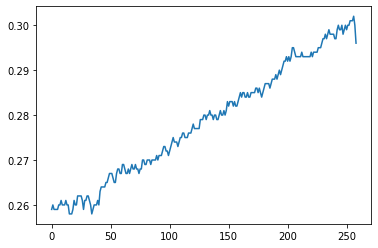

In [ ]:
df['Resistance'].plot()
train = df

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ['Volt', 'Temp', 'Resistance']
df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

print(df_scaled)

     Volt  Temp  Resistance
0     0.0   0.0    0.022727
1     0.0   0.0    0.045455
2     0.0   0.0    0.022727
3     0.0   0.0    0.022727
4     0.0   0.0    0.022727
..    ...   ...         ...
254   0.0   0.0    0.977273
255   0.0   0.0    0.977273
256   0.0   0.0    1.000000
257   0.0   0.0    0.954545
258   0.0   0.0    0.863636

[259 rows x 3 columns]


In [ ]:
train = df_scaled

In [ ]:
train

,Volt,Temp,Resistance
0,0.0,0.0,0.022727
1,0.0,0.0,0.045455
2,0.0,0.0,0.022727
3,0.0,0.0,0.022727
4,0.0,0.0,0.022727
...,...,...,...
254,0.0,0.0,0.977273
255,0.0,0.0,0.977273
256,0.0,0.0,1.000000
257,0.0,0.0,0.954545


train 끝



In [ ]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [ ]:
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']

train_feature = train[feature_cols]
train_label = train[label_cols]
# test_feature = test[feature_cols]
# test_label = test[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
train_feature

# test_feature, test_label = make_dataset(test_feature, test_label, 20)
# test_feature.shape, test_label.shape

array([[[0.        , 0.        , 0.02272727],
        [0.        , 0.        , 0.04545455],
        [0.        , 0.        , 0.02272727],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.02272727],
        [0.        , 0.        , 0.06818182]],

       [[0.        , 0.        , 0.04545455],
        [0.        , 0.        , 0.02272727],
        [0.        , 0.        , 0.02272727],
        ...,
        [0.        , 0.        , 0.02272727],
        [0.        , 0.        , 0.06818182],
        [0.        , 0.        , 0.04545455]],

       [[0.        , 0.        , 0.02272727],
        [0.        , 0.        , 0.02272727],
        [0.        , 0.        , 0.02272727],
        ...,
        [0.        , 0.        , 0.06818182],
        [0.        , 0.        , 0.04545455],
        [0.        , 0.        , 0.04545455]],

       ...,

       [[0.        , 0.        , 0.90909091],
        [0.        , 0.        , 0.90909091],
        [0.        , 0

LSTM 모델


In [ ]:


model = Sequential()
model.add(GRU(10, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join('C:/Users/wlsrm/data', 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

h = model.fit(x_train, y_train, 
                    epochs=1000, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid))

Epoch 1/1000
12/12 [==============================] - 2s 38ms/step - loss: 0.1451 - mse: 0.1451 - val_loss: 0.0818 - val_mse: 0.0818
Epoch 2/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.0727 - mse: 0.0727 - val_loss: 0.0437 - val_mse: 0.0437
Epoch 3/1000
12/12 [==============================] - 0s 13ms/step - loss: 0.0392 - mse: 0.0392 - val_loss: 0.0201 - val_mse: 0.0201
Epoch 4/1000
12/12 [==============================] - 0s 13ms/step - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 5/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 6/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 7/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 8/1000
12/12 [==============================] - 0s 12ms/step - 

In [ ]:
print(h.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


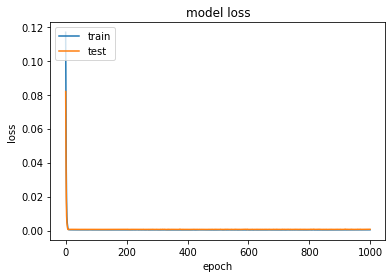

In [ ]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

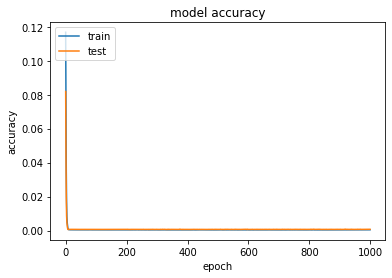

In [ ]:
plt.plot(h.history['mse'])
plt.plot(h.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_03.csv', encoding='utf8')
test_df

,MeasuredDate,CellNo,Resistance,Volt,Temp
0,2011.3.7 6:27,3,0.298,2.23,-20
1,2011.3.7 18:29,3,0.298,2.23,-20
2,2011.3.8 6:29,3,0.297,2.24,-20
3,2011.3.8 18:29,3,0.299,2.23,-20
4,2011.3.9 6:29,3,0.298,2.24,-20
...,...,...,...,...,...
253,2011.8.30 5:28,3,0.316,2.25,-20
254,2011.8.30 17:28,3,0.316,2.25,-20
255,2011.8.31 5:28,3,0.315,2.25,-20
256,2011.8.31 16:09,3,0.318,2.25,-20


In [ ]:
test_df = test_df.drop(['CellNo', 'MeasuredDate'], axis=1)
test_df

,Resistance,Volt,Temp
0,0.298,2.23,-20
1,0.298,2.23,-20
2,0.297,2.24,-20
3,0.299,2.23,-20
4,0.298,2.24,-20
...,...,...,...
253,0.316,2.25,-20
254,0.316,2.25,-20
255,0.315,2.25,-20
256,0.318,2.25,-20


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ['Volt', 'Temp', 'Resistance']
test_df_scaled = scaler.fit_transform(test_df[scale_cols])

test_df_scaled = pd.DataFrame(test_df_scaled)
test_df_scaled.columns = scale_cols

print(test_df_scaled)

         Volt  Temp  Resistance
0    0.333333   0.0    0.047619
1    0.333333   0.0    0.047619
2    0.666667   0.0    0.000000
3    0.333333   0.0    0.095238
4    0.666667   0.0    0.047619
..        ...   ...         ...
253  1.000000   0.0    0.904762
254  1.000000   0.0    0.904762
255  1.000000   0.0    0.857143
256  1.000000   0.0    1.000000
257  1.000000   0.0    0.904762

[258 rows x 3 columns]


In [ ]:
test = test_df_scaled

In [ ]:
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']

# train_feature = train[feature_cols]
# train_label = train[label_cols]
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 20)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(test_feature, test_label, test_size=0.2, random_state=42)


2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - mse: 0.0043
Loss: [0.004258683416992426, 0.004258683416992426]


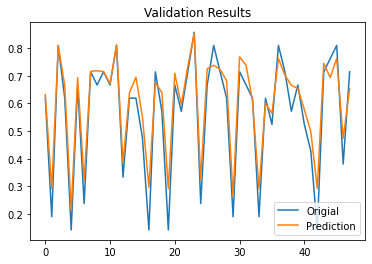

In [ ]:
yp = model.predict(x_test)
print('Loss:', model.evaluate(x_test, y_test))
plt.plot(y_test, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('Validation Results')
plt.show()

In [ ]:
yp = model.predict(x_test).reshape(-1)
print('Loss:', model.evaluate(x_test, y_test))  
print(yp.shape, y_test.shape)

2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043
Loss: [0.004258683416992426, 0.004258683416992426]
(48,) (48, 1)


2/2 [==============================] - 0s 6ms/step - loss: 0.0045 - mse: 0.0045
Loss: [0.004461073316633701, 0.004461073316633701]


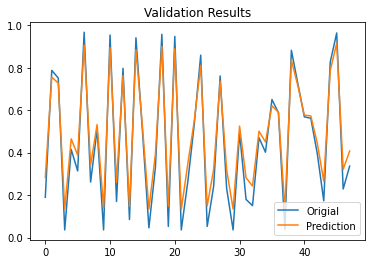

2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - mse: 0.0045
Loss: [0.004461073316633701, 0.004461073316633701]
(48,) (48, 1)


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_06.csv', encoding='utf8')

test_df = test_df.drop(['CellNo', 'MeasuredDate'], axis=1)

scaler = MinMaxScaler()
scale_cols = ['Volt', 'Temp', 'Resistance']
test_df_scaled = scaler.fit_transform(test_df[scale_cols])

test_df_scaled = pd.DataFrame(test_df_scaled)
test_df_scaled.columns = scale_cols

test = test_df_scaled
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']


test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 20)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(test_feature, test_label, test_size=0.2, random_state=42)

yp = model.predict(x_test)
print('Loss:', model.evaluate(x_test, y_test))
plt.plot(y_test, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('Validation Results')
plt.show()

yp = model.predict(x_test).reshape(-1)
print('Loss:', model.evaluate(x_test, y_test))  
print(yp.shape, y_test.shape)

2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - mse: 0.0071
Loss: [0.007076012436300516, 0.007076012436300516]


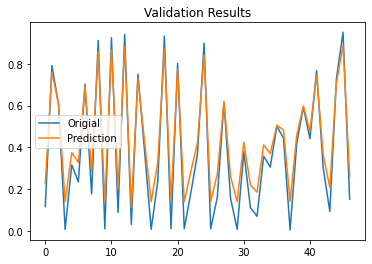

2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - mse: 0.0071
Loss: [0.007076012436300516, 0.007076012436300516]
(47,) (47, 1)


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_7.csv', encoding='utf8')

test_df = test_df.drop(['CellNo', 'MeasuredDate'], axis=1)

scaler = MinMaxScaler()
scale_cols = ['Volt', 'Temp', 'Resistance']
test_df_scaled = scaler.fit_transform(test_df[scale_cols])

test_df_scaled = pd.DataFrame(test_df_scaled)
test_df_scaled.columns = scale_cols

test = test_df_scaled
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']


test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 20)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(test_feature, test_label, test_size=0.2, random_state=42)

yp = model.predict(x_test)
print('Loss:', model.evaluate(x_test, y_test))
plt.plot(y_test, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('Validation Results')
plt.show()

yp = model.predict(x_test).reshape(-1)
print('Loss:', model.evaluate(x_test, y_test))  
print(yp.shape, y_test.shape)

2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021
Loss: [0.002072741277515888, 0.002072741277515888]


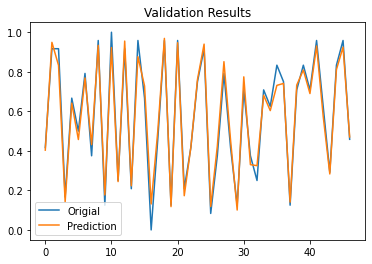

2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021
Loss: [0.002072741277515888, 0.002072741277515888]
(47,) (47, 1)


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_9.csv', encoding='utf8')

test_df = test_df.drop(['CellNo', 'MeasuredDate'], axis=1)

scaler = MinMaxScaler()
scale_cols = ['Volt', 'Temp', 'Resistance']
test_df_scaled = scaler.fit_transform(test_df[scale_cols])

test_df_scaled = pd.DataFrame(test_df_scaled)
test_df_scaled.columns = scale_cols

test = test_df_scaled
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']


test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 20)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(test_feature, test_label, test_size=0.2, random_state=42)

yp = model.predict(x_test)
print('Loss:', model.evaluate(x_test, y_test))
plt.plot(y_test, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('Validation Results')
plt.show()

yp = model.predict(x_test).reshape(-1)
print('Loss:', model.evaluate(x_test, y_test))  
print(yp.shape, y_test.shape)

2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - mse: 0.0024
Loss: [0.002446959726512432, 0.002446959726512432]


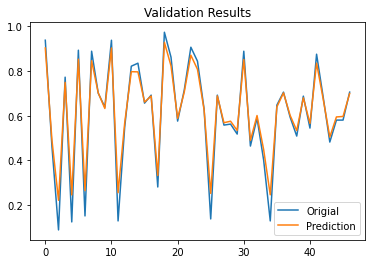

2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - mse: 0.0024
Loss: [0.002446959726512432, 0.002446959726512432]
(47,) (47, 1)


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_18.csv', encoding='utf8')

test_df = test_df.drop(['CellNo', 'MeasuredDate'], axis=1)

scaler = MinMaxScaler()
scale_cols = ['Volt', 'Temp', 'Resistance']
test_df_scaled = scaler.fit_transform(test_df[scale_cols])

test_df_scaled = pd.DataFrame(test_df_scaled)
test_df_scaled.columns = scale_cols

test = test_df_scaled
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']


test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 20)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(test_feature, test_label, test_size=0.2, random_state=42)

yp = model.predict(x_test)
print('Loss:', model.evaluate(x_test, y_test))
plt.plot(y_test, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('Validation Results')
plt.show()

yp = model.predict(x_test).reshape(-1)
print('Loss:', model.evaluate(x_test, y_test))  
print(yp.shape, y_test.shape)

2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - mse: 0.0023
Loss: [0.0022733830846846104, 0.0022733830846846104]


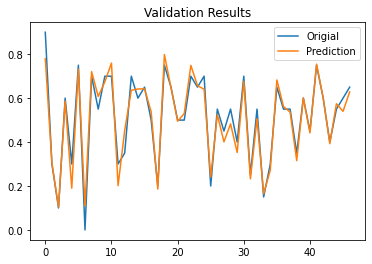

2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - mse: 0.0023
Loss: [0.0022733830846846104, 0.0022733830846846104]
(47,) (47, 1)


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_19.csv', encoding='utf8')

test_df = test_df.drop(['CellNo', 'MeasuredDate'], axis=1)

scaler = MinMaxScaler()
scale_cols = ['Volt', 'Temp', 'Resistance']
test_df_scaled = scaler.fit_transform(test_df[scale_cols])

test_df_scaled = pd.DataFrame(test_df_scaled)
test_df_scaled.columns = scale_cols

test = test_df_scaled
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']


test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 20)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(test_feature, test_label, test_size=0.2, random_state=42)

yp = model.predict(x_test)
print('Loss:', model.evaluate(x_test, y_test))
plt.plot(y_test, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('Validation Results')
plt.show()

yp = model.predict(x_test).reshape(-1)
print('Loss:', model.evaluate(x_test, y_test))  
print(yp.shape, y_test.shape)

2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024
Loss: [0.00240830285474658, 0.00240830285474658]


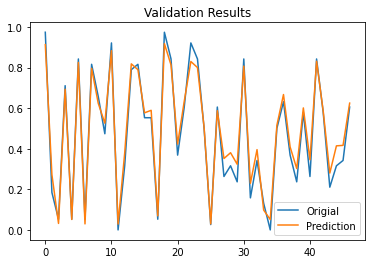

2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - mse: 0.0024
Loss: [0.00240830285474658, 0.00240830285474658]
(47,) (47, 1)


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_20.csv', encoding='utf8')

test_df = test_df.drop(['CellNo', 'MeasuredDate'], axis=1)

scaler = MinMaxScaler()
scale_cols = ['Volt', 'Temp', 'Resistance']
test_df_scaled = scaler.fit_transform(test_df[scale_cols])

test_df_scaled = pd.DataFrame(test_df_scaled)
test_df_scaled.columns = scale_cols

test = test_df_scaled
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']


test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 20)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(test_feature, test_label, test_size=0.2, random_state=42)

yp = model.predict(x_test)
print('Loss:', model.evaluate(x_test, y_test))
plt.plot(y_test, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('Validation Results')
plt.show()

yp = model.predict(x_test).reshape(-1)
print('Loss:', model.evaluate(x_test, y_test))  
print(yp.shape, y_test.shape)

2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - mse: 0.0055
Loss: [0.005511661991477013, 0.005511661991477013]


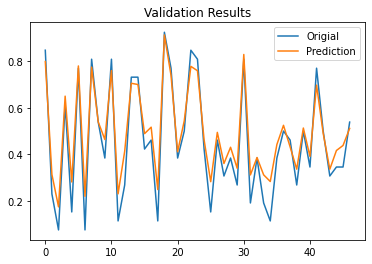

2/2 [==============================] - 0s 6ms/step - loss: 0.0055 - mse: 0.0055
Loss: [0.005511661991477013, 0.005511661991477013]
(47,) (47, 1)


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0221_20110307012732_cell_22.csv', encoding='utf8')

test_df = test_df.drop(['CellNo', 'MeasuredDate'], axis=1)

scaler = MinMaxScaler()
scale_cols = ['Volt', 'Temp', 'Resistance']
test_df_scaled = scaler.fit_transform(test_df[scale_cols])

test_df_scaled = pd.DataFrame(test_df_scaled)
test_df_scaled.columns = scale_cols

test = test_df_scaled
feature_cols = ['Volt', 'Temp', 'Resistance']
label_cols = ['Resistance']


test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 20)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(test_feature, test_label, test_size=0.2, random_state=42)


yp = model.predict(x_test)
print('Loss:', model.evaluate(x_test, y_test))
plt.plot(y_test, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('Validation Results')
plt.show()

yp = model.predict(x_test).reshape(-1)
print('Loss:', model.evaluate(x_test, y_test))  
print(yp.shape, y_test.shape)